# Data Cleaning Exercise

## Bank loan dataset
1. Loan_ID	: Unique Loan ID
2. Gender	: Male/ Female
3. Married :	Marital Status (Yes/No)
4. Dependents :	Number of dependents
5. Education : Applicant Education (Graduate/ Under Graduate)
6. Self_Employed	: Self employed (Yes/No)
7. ApplicantIncome	: Applicant income
8. CoapplicantIncome	: Coapplicant income
9. LoanAmount : Loan amount in thousands
10. Loan_Amount_Term : Term of loan in months
11. Credit_History :	credit history meets guidelines
12. Property_Area :	Urban/ Semi Urban/ Rural
13. Loan_Status :	Loan approved (Yes/No)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

**นำเข้าข้อมูลไฟล์ madfhantr**

In [ ]:
data = pd.read_csv('madfhantr.csv')

**ใช้ head() descibe() info() เพื่อดูข้อมูลเบื้องต้น**

In [ ]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


พล็อตกราฟเพื่อดูความสัมพันธ์ของข้อมูลที่เป็น categorical

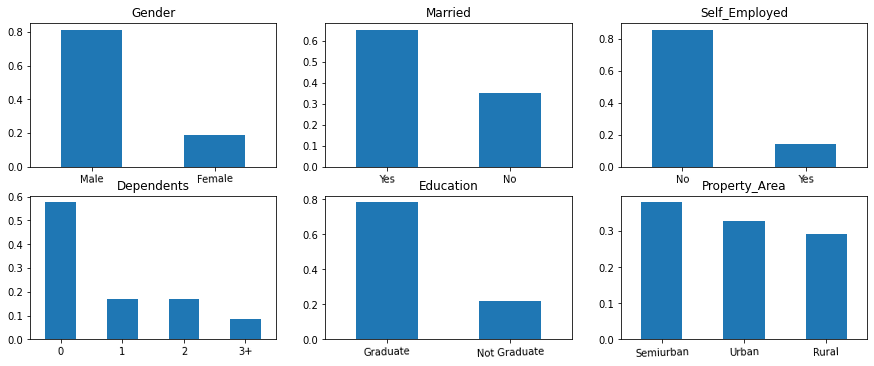

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(331) 
data['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender',rot=2) 
plt.subplot(332) 
data['Married'].value_counts(normalize=True).plot.bar(title= 'Married',rot=2) 
plt.subplot(333) 
data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed',rot=2)
plt.subplot(334) 
data['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents',rot=2)
plt.subplot(335) 
data['Education'].value_counts(normalize=True).plot.bar(title= 'Education',rot=2)
plt.subplot(336) 
data['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area',rot=2)

พล็อตกราฟเพื่อดูความสัมพันธ์ของข้อมูลที่เป็น continuous

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc560338d0>,
      dtype=object)

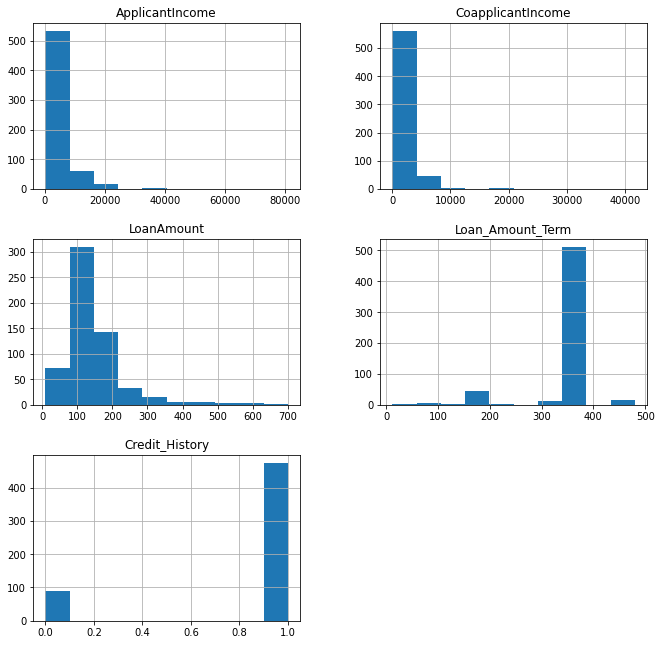

In [ ]:
data[data.dtypes[(data.dtypes=="float64")|(data.dtypes=="int64")].index.values].hist(figsize=[11,11])

**นับจำนวนค่าในตัวแปร `Loan Status`**

Y    422
N    192
Name: Loan_Status, dtype: int64

**ตรวจสอบ ค่าว่าง ว่ามีอยู่ในข้อมูลหรือไม่**

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**ใช้ .shape เพื่อดูขนาดของข้อมูล**

(614, 13)

### Drop

**DROP row ที่มีค่าว่าง**

**เลือกเฉพาะคอลัมน์ที่ใช้ `Gender` , `Married`, `Education`, `Self_Employed`, `Credit_History` และ `Loan_Status`**

**เปลี่ยนค่า Male -> 1, Female -> 0 ในคอลัมน์ Gender**

**เปลี่ยนค่า Yes -> 1, No -> 0 ในคอลัมน์ Married**

**เปลี่ยนค่า Yes -> 1, No -> 0 ในคอลัมน์ Self_Employed**

**เปลี่ยนค่า Graduate -> 1, Not Graduate -> 0 ในคอลัมน์ Education**

**กำหนดตัวแปรต้น (X) และตัวแปรตาม (y)**

**แบ่งข้อมูลเป็น 2 ชุดคือ Training Data กับ Testing Data โดยใช้คำสั่ง `train_test_split` โดยให้ `test_size=0.3` และ `random_state=42`**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**fit model โดยการกำหนด `max_depth = 3`**

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=42) #criterion='entropy', max_depth=3, splitter='best'
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

**วาด Decision Tree**

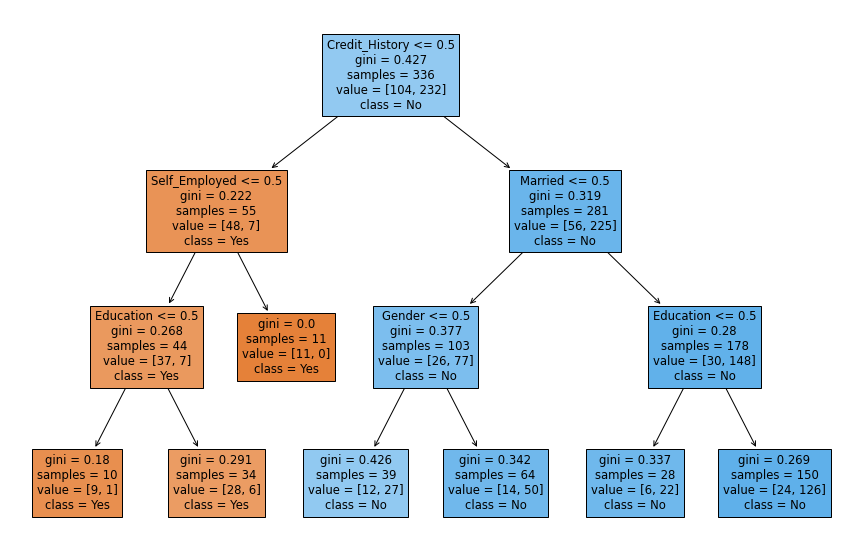

In [ ]:
# Plot decission tree
fig = plt.figure(figsize=(15,10))
fig = tree.plot_tree(clf, 
                    feature_names=['Gender','Married','Education','Self_Employed','Credit_History'],
                    class_names=['Yes','No'],
                    filled=True)

**คำนวณ accuracy ของ model**

In [ ]:
clf.score(X_test,y_test) #3

0.7986111111111112

**คำนวณ cross validation**

In [ ]:
cross = cross_val_score(clf, X, y)
print(f'Cross validation score\t: {np.round(cross.mean()*100,2)}%')

### Fillna

**แทนค่า null ด้วยค่า mode ในคอลัมน์ `Gender`, `Married`, `Dependents`, `Self_Employed`, `Credit_History` และแทนค่า null ด้วยค่า median ในคอลัมน์ `LoanAmount`**

**เลือกเฉพาะคอลัมน์ที่ใช้ `Gender` , `Married`, `Education`, `Self_Employed`, `LoanAmount`, `Credit_History` และ `Loan_Status`**

**เปลี่ยนค่า Male -> 1, Female -> 0 ในคอลัมน์ Gender**

**เปลี่ยนค่า Yes -> 1, No -> 0 ในคอลัมน์ Married**

**เปลี่ยนค่า Yes -> 1, No -> 0 ในคอลัมน์ Self_Employed**

**เปลี่ยนค่า Graduate -> 1, Not Graduate -> 0 ในคอลัมน์ Education**

**กำหนดตัวแปรต้น (X) และตัวแปรตาม (y)**

**แบ่งข้อมูลเป็น 2 ชุดคือ Training Data กับ Testing Data โดยใช้คำสั่ง `train_test_split` โดยให้ `test_size=0.3` และ `random_state=42`**

**fit model โดยการกำหนด `max_depth = 3`**

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

**วาด Decision Tree**

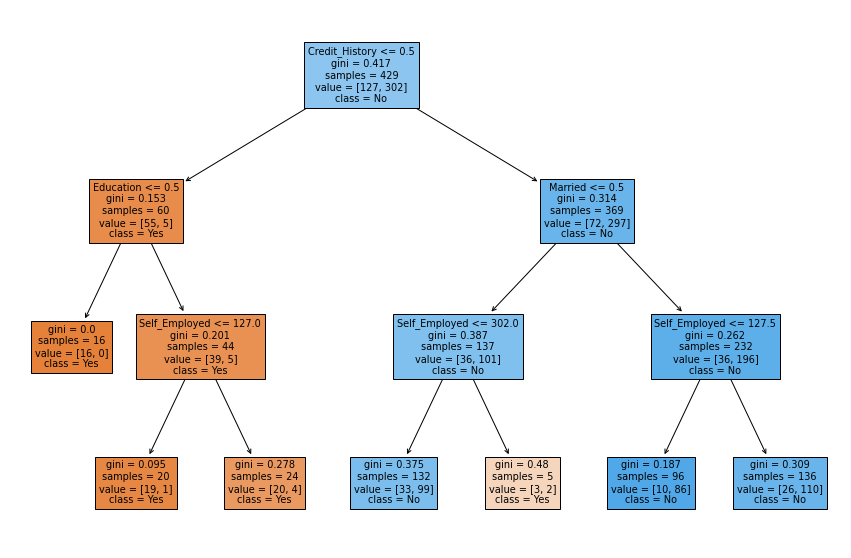

In [ ]:
# Plot decission tree


**คำนวณ accuracy ของ model**

0.7945945945945946

**คำนวณค่า Precision Recall และ AUC ROC ของ model**

**ทำการ fit model Logistic Regression**

**คำนวณ accuracy ของ model**

**คำนวณค่า Precision Recall และ AUC ROC ของ model**